## Fetch the data

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape)

(70000, 784)


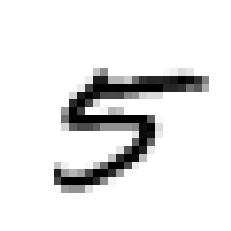

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[41000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

## Split the data

In [0]:
y = y.astype(np.uint8)

train_range = 60000

X_train, X_test, y_train, y_test = X[:train_range], X[train_range:], y[:train_range], y[train_range:]

shuffle_index = np.random.permutation(train_range)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

##  Grid search

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [3,4,5],
    'weights': ['uniform', 'distance']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 3,
    cv = 5,
    n_jobs =-1
)
gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed: 144.5min remaining: 22.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 144.5min finished


In [6]:
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.9733833333333334
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')
{'n_neighbors': 4, 'weights': 'distance'}


Best params:
`{'n_neighbors': 4, 'weights': 'distance'}`